In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_taxis = pd.read_parquet(r'Datasets/limpios/taxis.parquet')

In [3]:
# Conteo de los viajes por tipo de vehículo
trips_count_by_type = df_taxis.groupby('taxi_type').size().reset_index(name='trip_count')

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\698375068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='taxi_type', y='trip_count', data=trips_count_by_type, palette=['yellow', 'green'])


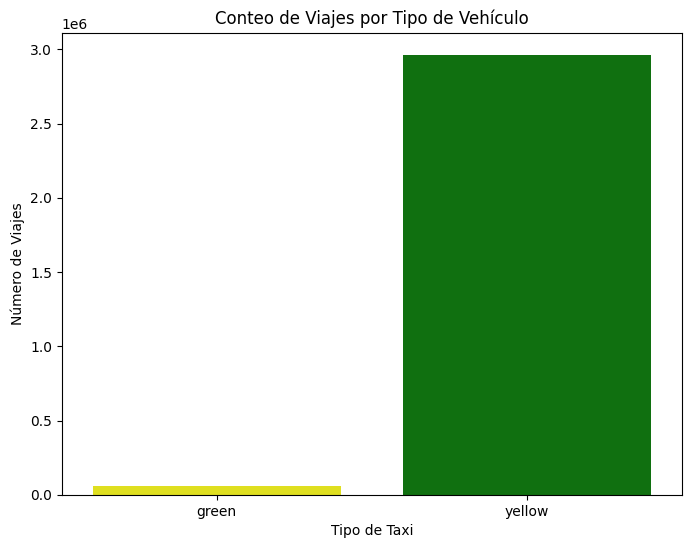

In [4]:
plt.figure(figsize=(8, 6))
sns.barplot(x='taxi_type', y='trip_count', data=trips_count_by_type, palette=['yellow', 'green'])
plt.xlabel('Tipo de Taxi')
plt.ylabel('Número de Viajes')
plt.title('Conteo de Viajes por Tipo de Vehículo')
plt.show()

In [5]:
# Conteo de los viajes por número de pasajeros
passenger_count = df_taxis.groupby('passenger_count').size().reset_index(name='trip_count')

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\17959887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='trip_count', data=passenger_count, palette='Blues_d')


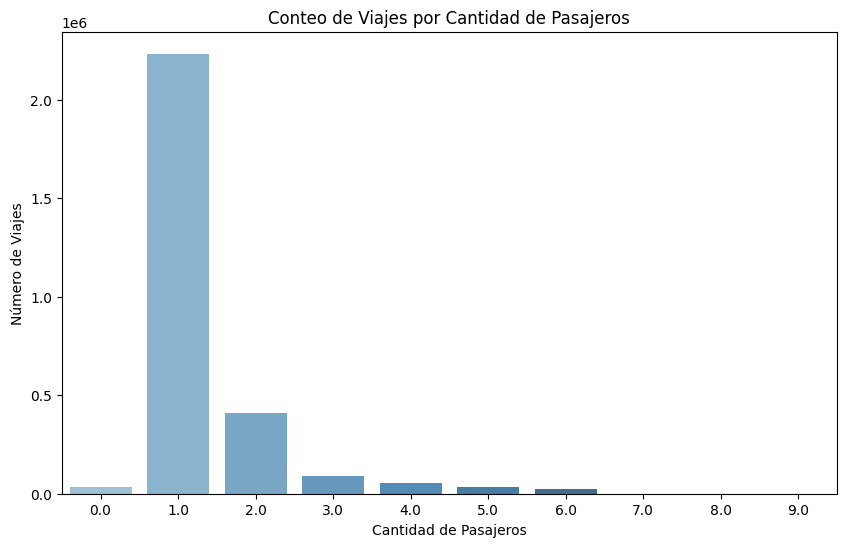

In [6]:
# Graficar usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='trip_count', data=passenger_count, palette='Blues_d')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Número de Viajes')
plt.title('Conteo de Viajes por Cantidad de Pasajeros')
plt.xticks(passenger_count['passenger_count'])  # Asegura que todas las etiquetas de los pasajeros sean visibles
plt.show()

In [7]:
# Conteo de los viajes por tipo de pago y tipo de tarifa
payment_ratecode_count = df_taxis.groupby(['payment_type', 'RatecodeID']).size().reset_index(name='trip_count')

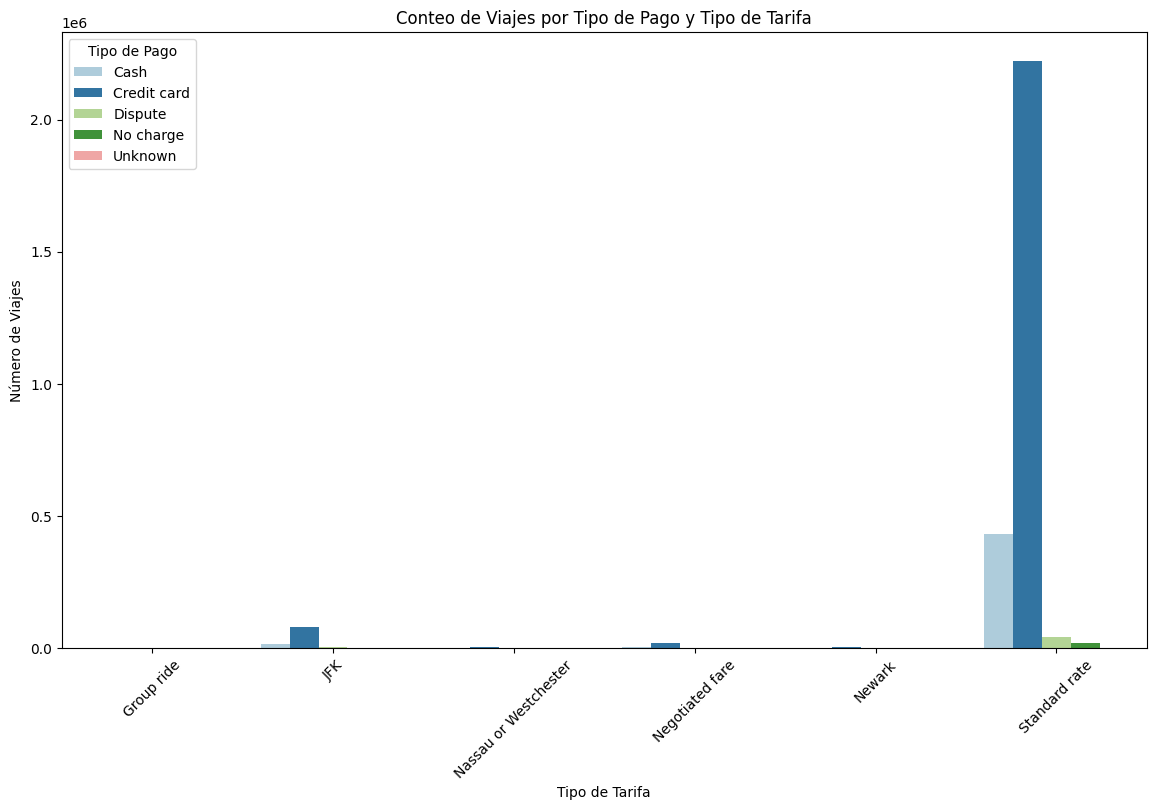

In [8]:
# Graficar usando seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='RatecodeID', y='trip_count', hue='payment_type', data=payment_ratecode_count, palette='Paired')
plt.xlabel('Tipo de Tarifa')
plt.ylabel('Número de Viajes')
plt.title('Conteo de Viajes por Tipo de Pago y Tipo de Tarifa')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Pago')
plt.show()

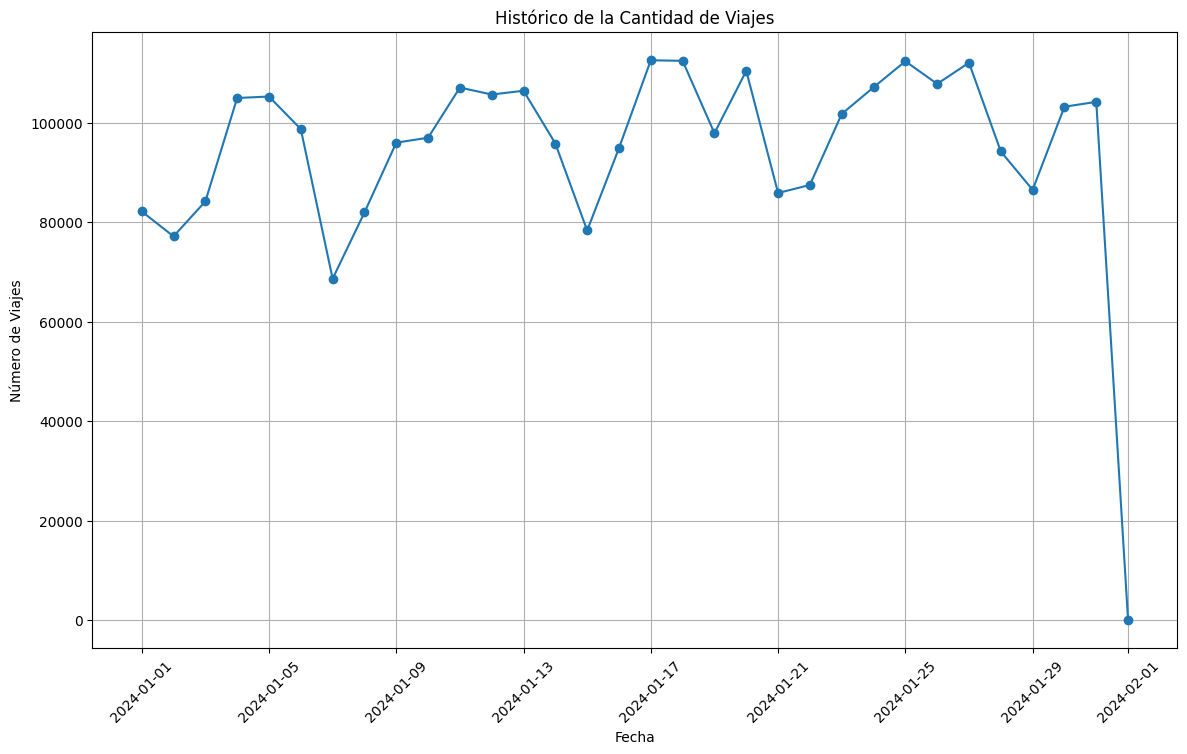

In [9]:
# Asegurarse de que la columna 'pickup_datetime' está en formato datetime
df_taxis['pickup_datetime'] = pd.to_datetime(df_taxis['pickup_datetime'])

# Agrupar por día y contar el número de viajes
trips_per_day = df_taxis.groupby(df_taxis['pickup_datetime'].dt.date).size().reset_index(name='trip_count')

# Graficar usando matplotlib
plt.figure(figsize=(14, 8))
plt.plot(trips_per_day['pickup_datetime'], trips_per_day['trip_count'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Número de Viajes')
plt.title('Histórico de la Cantidad de Viajes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

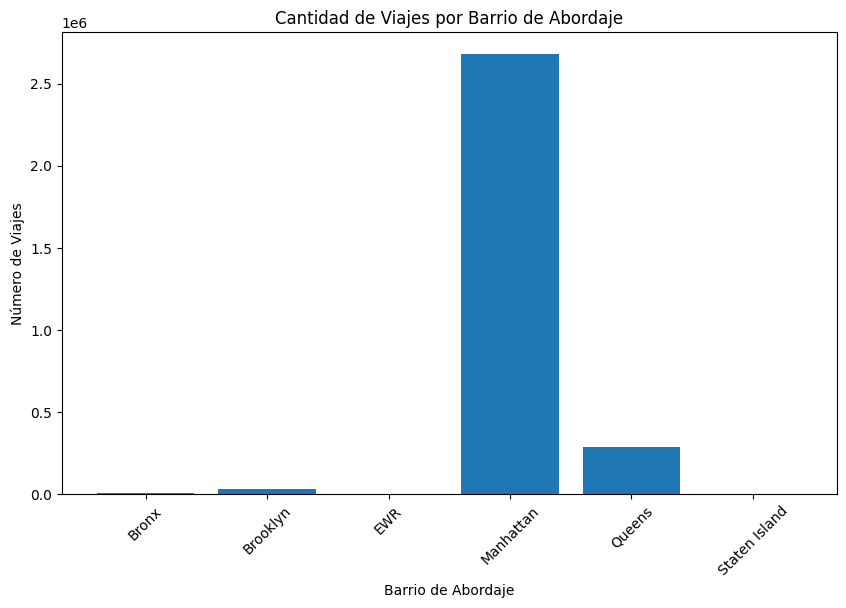

In [10]:
df_location = pd.read_parquet(r'Datasets/limpios/localizacion.parquet')
# Combinar los datos de abordaje con la información de barrios y zonas
df_combined = pd.merge(df_taxis, df_location, left_on='PULocationID', right_on='LocationID', how='inner')
# Conteo de viajes por barrio de abordaje
trips_per_borough = df_combined.groupby('Borough').size().reset_index(name='trip_count')
# Graficar la cantidad de viajes por barrio de abordaje
plt.figure(figsize=(10, 6))
plt.bar(trips_per_borough['Borough'], trips_per_borough['trip_count'])
plt.xlabel('Barrio de Abordaje')
plt.ylabel('Número de Viajes')
plt.title('Cantidad de Viajes por Barrio de Abordaje')
plt.xticks(rotation=45)
plt.show()

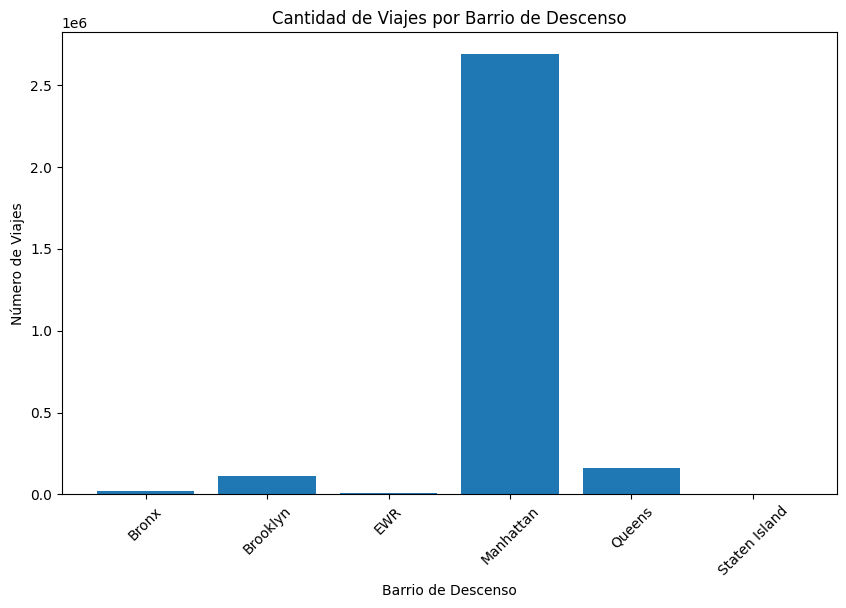

In [11]:
# Combinar los datos de Descenso con la información de barrios y zonas
df_combined = pd.merge(df_taxis, df_location, left_on='DOLocationID', right_on='LocationID', how='inner')
# Conteo de viajes por barrio de Descenso
trips_per_borough = df_combined.groupby('Borough').size().reset_index(name='trip_count')
# Graficar la cantidad de viajes por barrio de Descenso
plt.figure(figsize=(10, 6))
plt.bar(trips_per_borough['Borough'], trips_per_borough['trip_count'])
plt.xlabel('Barrio de Descenso')
plt.ylabel('Número de Viajes')
plt.title('Cantidad de Viajes por Barrio de Descenso')
plt.xticks(rotation=45)
plt.show()

# Análisis de viajes en taxis amarillos

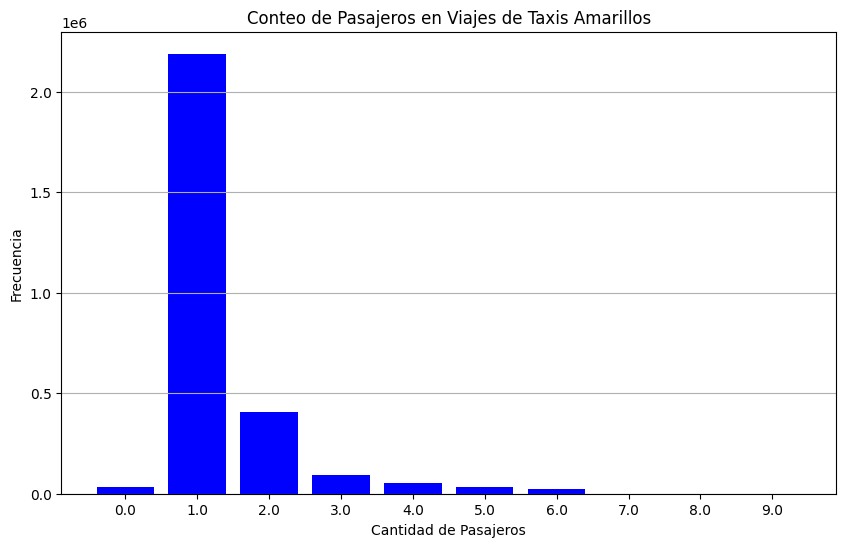

In [12]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Conteo de pasajeros
conteo_pasajeros = df_yellow_taxi['passenger_count'].value_counts().sort_index()

# Graficar el conteo de pasajeros
plt.figure(figsize=(10, 6))
plt.bar(conteo_pasajeros.index.astype(str), conteo_pasajeros.values, color='blue')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Frecuencia')
plt.title('Conteo de Pasajeros en Viajes de Taxis Amarillos')
plt.grid(axis='y')
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\3507413646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])


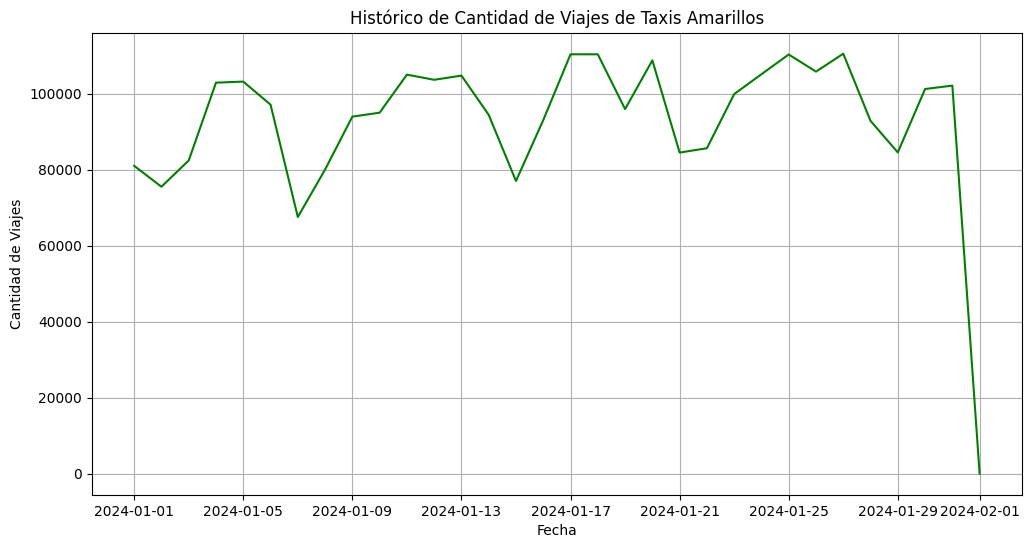

In [13]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Convertir la columna de fecha de los viajes al formato de fecha adecuado
df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])

# Obtener el histórico de la cantidad de viajes por fecha
historico_viajes = df_yellow_taxi.groupby(df_yellow_taxi['pickup_datetime'].dt.date).size()

# Graficar el histórico de la cantidad de viajes
plt.figure(figsize=(12, 6))
historico_viajes.plot(kind='line', color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.title('Histórico de Cantidad de Viajes de Taxis Amarillos')
plt.grid(True)
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\3546460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])


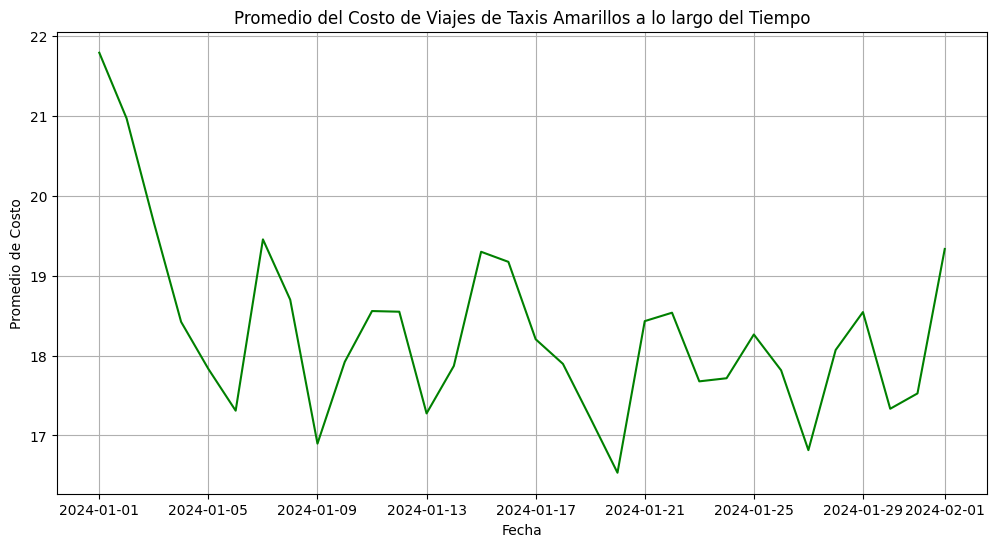

In [14]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Convertir la columna de fecha de los viajes al formato de fecha adecuado
df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])

# Calcular el promedio del costo por fecha
promedio_costo_fecha = df_yellow_taxi.groupby(df_yellow_taxi['pickup_datetime'].dt.date)['fare_amount'].mean()

# Graficar el promedio del costo a lo largo del tiempo
plt.figure(figsize=(12, 6))
promedio_costo_fecha.plot(kind='line', color='green')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Costo')
plt.title('Promedio del Costo de Viajes de Taxis Amarillos a lo largo del Tiempo')
plt.grid(True)
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\60019761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])


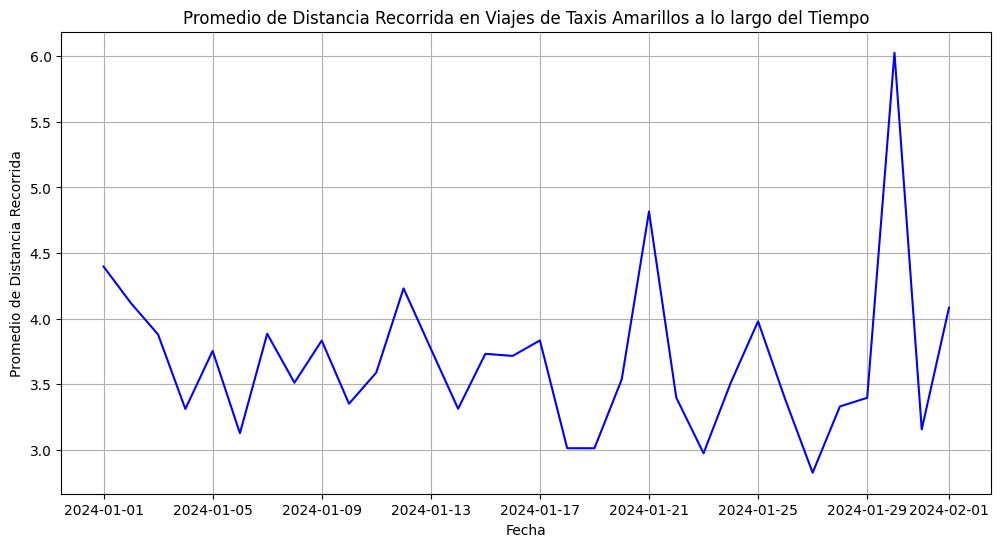

In [15]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Convertir la columna de fecha de los viajes al formato de fecha adecuado
df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])

# Calcular el promedio de la distancia recorrida por fecha
promedio_distancia_fecha = df_yellow_taxi.groupby(df_yellow_taxi['pickup_datetime'].dt.date)['trip_distance'].mean()

# Graficar el promedio de la distancia recorrida a lo largo del tiempo
plt.figure(figsize=(12, 6))
promedio_distancia_fecha.plot(kind='line', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Distancia Recorrida')
plt.title('Promedio de Distancia Recorrida en Viajes de Taxis Amarillos a lo largo del Tiempo')
plt.grid(True)
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2866964284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])
C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2866964284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow_taxi['dropoff_datetime'] = pd.to_datetime(df_yellow_taxi['dropoff_datetime'])
C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2866964284.py:9: SettingWithCopyWarning: 
A value is trying to be

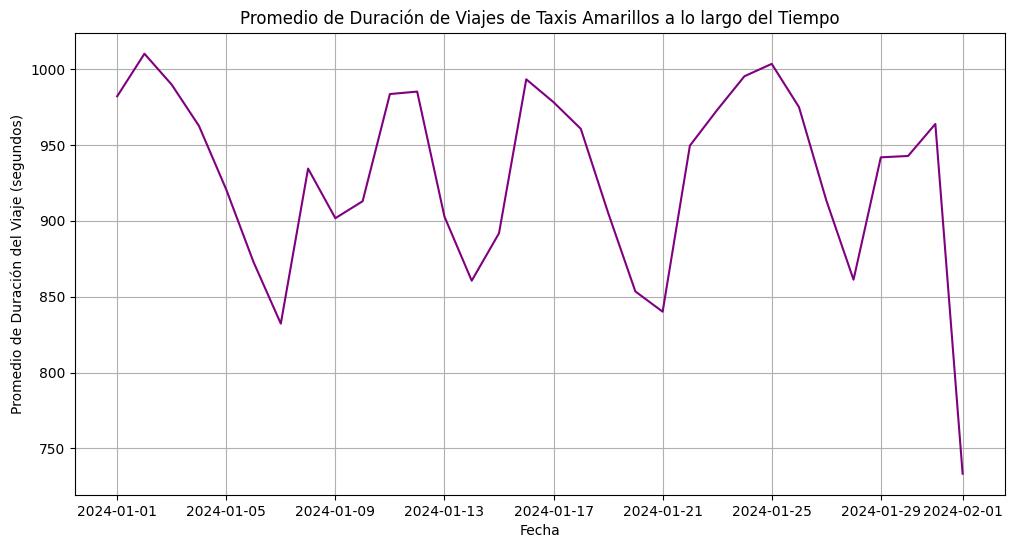

In [16]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Convertir las columnas de fecha de los viajes al formato de fecha adecuado si no están en ese formato
df_yellow_taxi['pickup_datetime'] = pd.to_datetime(df_yellow_taxi['pickup_datetime'])
df_yellow_taxi['dropoff_datetime'] = pd.to_datetime(df_yellow_taxi['dropoff_datetime'])

# Calcular la duración de los viajes
df_yellow_taxi['duracion_viaje'] = (df_yellow_taxi['dropoff_datetime'] - df_yellow_taxi['pickup_datetime']).dt.total_seconds()

# Calcular el promedio de la duración de los viajes por fecha
promedio_duracion_fecha = df_yellow_taxi.groupby(df_yellow_taxi['pickup_datetime'].dt.date)['duracion_viaje'].mean()

# Graficar el promedio de la duración de los viajes a lo largo del tiempo
plt.figure(figsize=(12, 6))
promedio_duracion_fecha.plot(kind='line', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Duración del Viaje (segundos)')
plt.title('Promedio de Duración de Viajes de Taxis Amarillos a lo largo del Tiempo')
plt.grid(True)
plt.show()

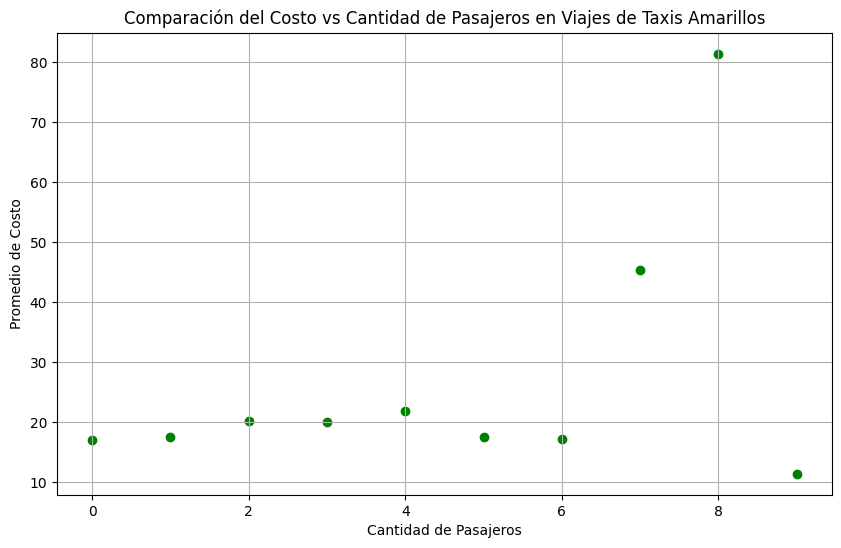

In [17]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Calcular el promedio de costo y la cantidad de pasajeros por viaje
promedio_costo_pasajeros = df_yellow_taxi.groupby('passenger_count')['fare_amount'].mean().reset_index()

# Graficar la comparación del costo vs la cantidad de pasajeros
plt.figure(figsize=(10, 6))
plt.scatter(promedio_costo_pasajeros['passenger_count'], promedio_costo_pasajeros['fare_amount'], color='green')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Promedio de Costo')
plt.title('Comparación del Costo vs Cantidad de Pasajeros en Viajes de Taxis Amarillos')
plt.grid(True)
plt.show()

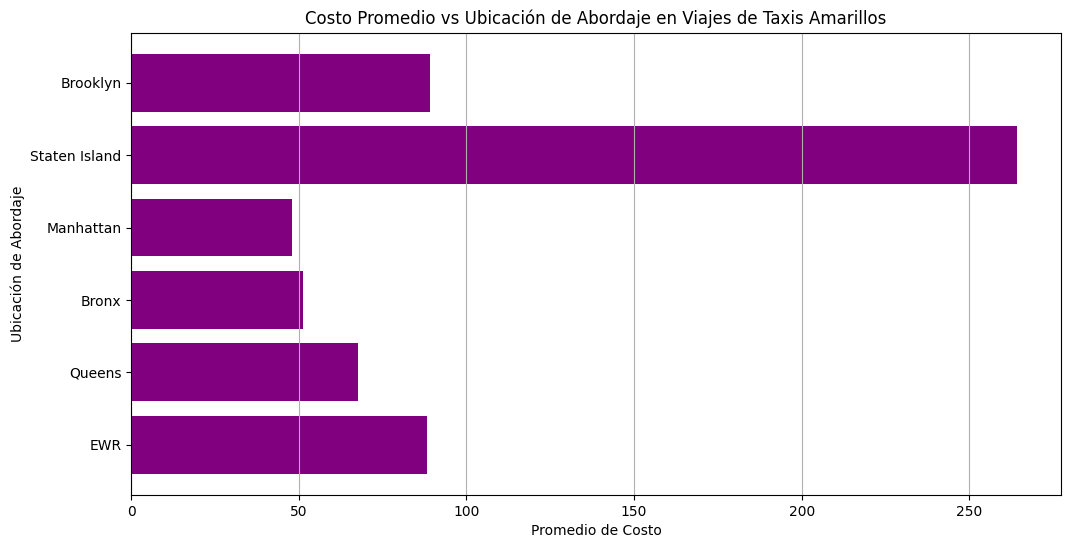

In [18]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Calcular el promedio de costo por ubicación de abordaje
promedio_costo_localizacion = df_yellow_taxi.groupby('PULocationID')['fare_amount'].mean().reset_index()

# Obtener nombres de las ubicaciones de abordaje a partir de otro dataset
df_ubicaciones = pd.read_parquet(r'Datasets/limpios/localizacion.parquet')
df_ubicaciones.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

# Combinar los DataFrames para obtener nombres de ubicaciones
promedio_costo_localizacion = pd.merge(promedio_costo_localizacion, df_ubicaciones, on='PULocationID')

# Graficar la comparación del costo vs la localización de abordaje
plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_localizacion['Borough'], promedio_costo_localizacion['fare_amount'], color='purple')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Abordaje')
plt.title('Costo Promedio vs Ubicación de Abordaje en Viajes de Taxis Amarillos')
plt.grid(axis='x')
plt.show()

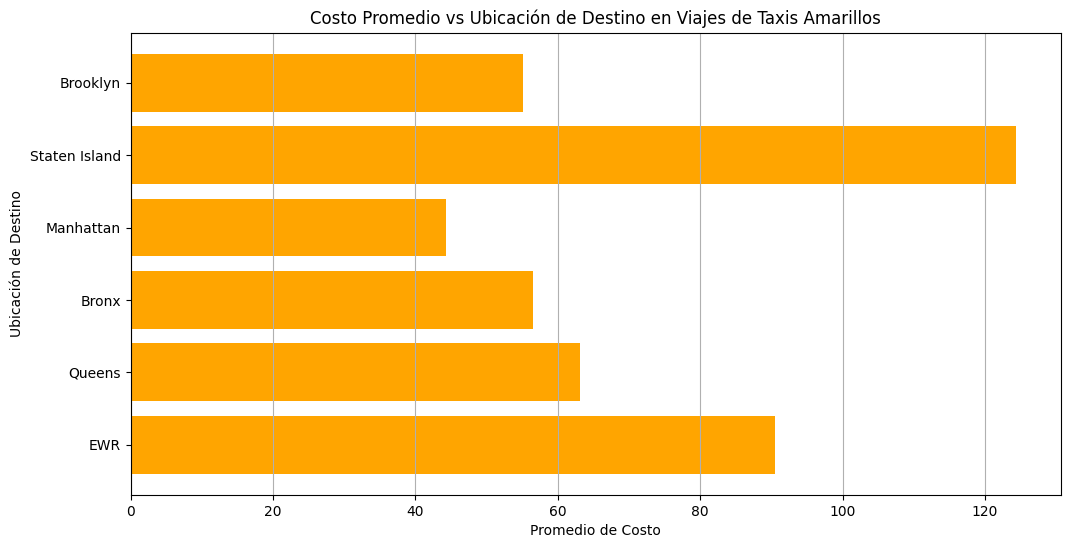

In [19]:
# Filtrar los datos para incluir solo los viajes de taxis amarillos
df_yellow_taxi = df_taxis[df_taxis['taxi_type'] == 'yellow']

# Calcular el promedio de costo por ubicación de destino
promedio_costo_destino = df_yellow_taxi.groupby('DOLocationID')['fare_amount'].mean().reset_index()

# Obtener nombres de las ubicaciones de destino a partir de otro dataset
df_destinos = pd.read_parquet(r'Datasets/limpios/localizacion.parquet')
df_destinos.rename(columns={'LocationID': 'DOLocationID'}, inplace=True)

# Combinar los DataFrames para obtener nombres de destinos
promedio_costo_destino = pd.merge(promedio_costo_destino, df_destinos, on='DOLocationID')

# Graficar la comparación del costo vs la localización de destino
plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_destino['Borough'], promedio_costo_destino['fare_amount'], color='orange')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Destino')
plt.title('Costo Promedio vs Ubicación de Destino en Viajes de Taxis Amarillos')
plt.grid(axis='x')
plt.show()

# Análisis de viajes en taxis verdes

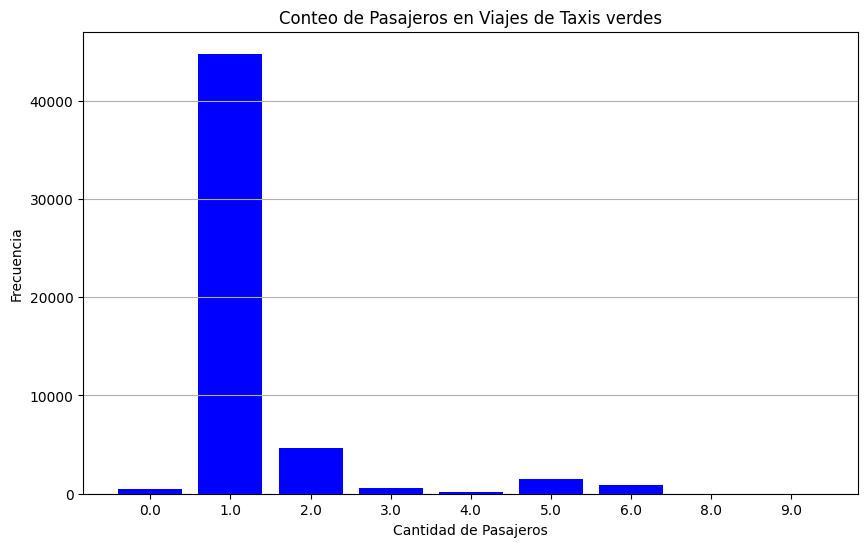

In [20]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Conteo de pasajeros
conteo_pasajeros = df_green_taxi['passenger_count'].value_counts().sort_index()

# Graficar el conteo de pasajeros
plt.figure(figsize=(10, 6))
plt.bar(conteo_pasajeros.index.astype(str), conteo_pasajeros.values, color='blue')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Frecuencia')
plt.title('Conteo de Pasajeros en Viajes de Taxis verdes')
plt.grid(axis='y')
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2511248430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])


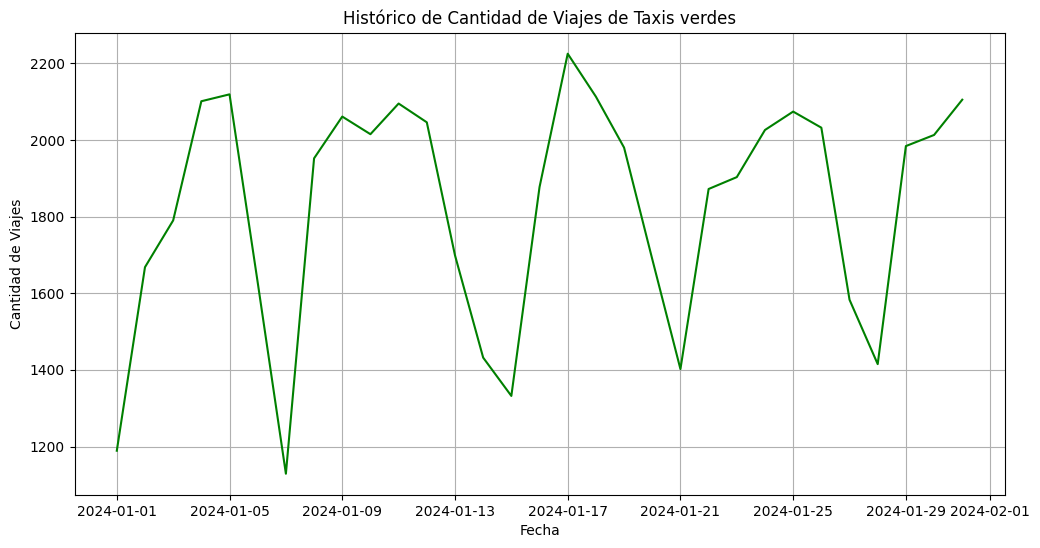

In [21]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Convertir la columna de fecha de los viajes al formato de fecha adecuado
df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])

# Obtener el histórico de la cantidad de viajes por fecha
historico_viajes = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date).size()

# Graficar el histórico de la cantidad de viajes
plt.figure(figsize=(12, 6))
historico_viajes.plot(kind='line', color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.title('Histórico de Cantidad de Viajes de Taxis verdes')
plt.grid(True)
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\3545670585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])


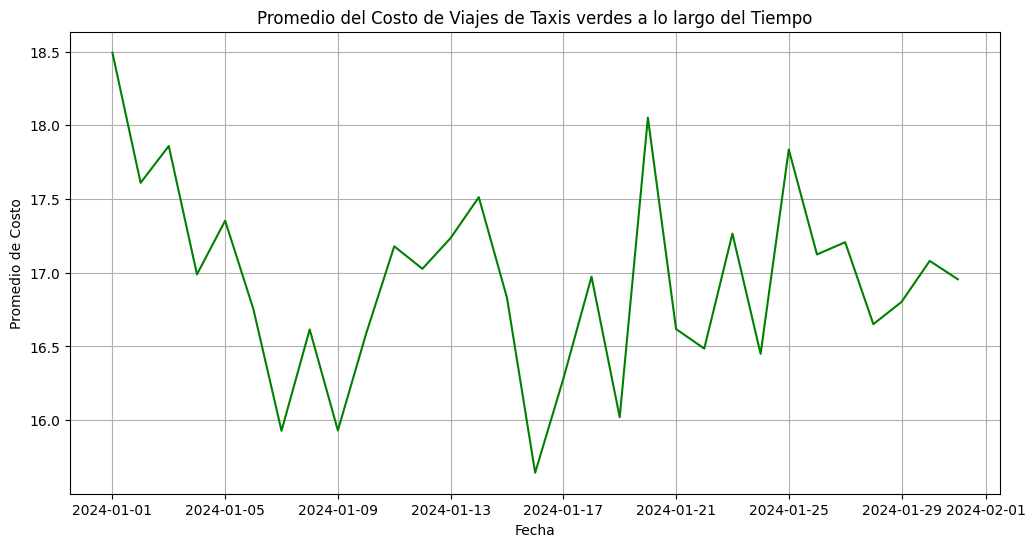

In [22]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Convertir la columna de fecha de los viajes al formato de fecha adecuado
df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])

# Calcular el promedio del costo por fecha
promedio_costo_fecha = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date)['fare_amount'].mean()

# Graficar el promedio del costo a lo largo del tiempo
plt.figure(figsize=(12, 6))
promedio_costo_fecha.plot(kind='line', color='green')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Costo')
plt.title('Promedio del Costo de Viajes de Taxis verdes a lo largo del Tiempo')
plt.grid(True)
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2033734642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])


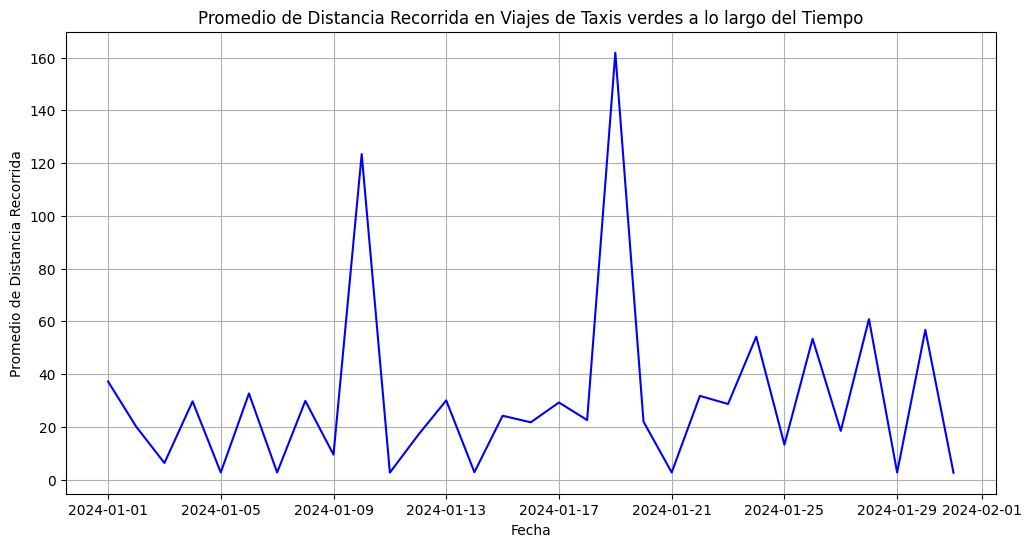

In [23]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Convertir la columna de fecha de los viajes al formato de fecha adecuado
df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])

# Calcular el promedio de la distancia recorrida por fecha
promedio_distancia_fecha = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date)['trip_distance'].mean()

# Graficar el promedio de la distancia recorrida a lo largo del tiempo
plt.figure(figsize=(12, 6))
promedio_distancia_fecha.plot(kind='line', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Distancia Recorrida')
plt.title('Promedio de Distancia Recorrida en Viajes de Taxis verdes a lo largo del Tiempo')
plt.grid(True)
plt.show()

C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2792253143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])
C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2792253143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_taxi['dropoff_datetime'] = pd.to_datetime(df_green_taxi['dropoff_datetime'])
C:\Users\augus\AppData\Local\Temp\ipykernel_2916\2792253143.py:9: SettingWithCopyWarning: 
A value is trying to be set

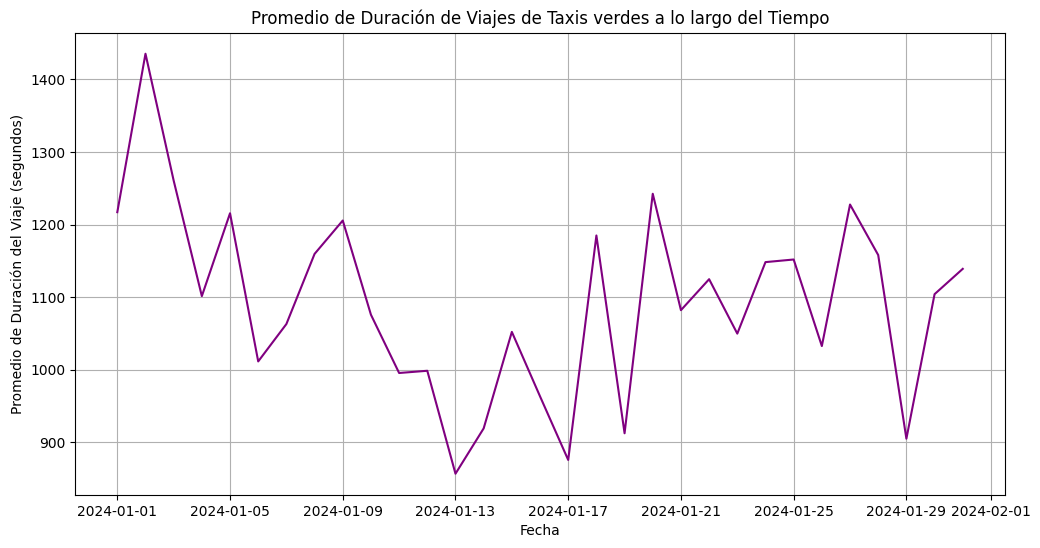

In [24]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Convertir las columnas de fecha de los viajes al formato de fecha adecuado si no están en ese formato
df_green_taxi['pickup_datetime'] = pd.to_datetime(df_green_taxi['pickup_datetime'])
df_green_taxi['dropoff_datetime'] = pd.to_datetime(df_green_taxi['dropoff_datetime'])

# Calcular la duración de los viajes
df_green_taxi['duracion_viaje'] = (df_green_taxi['dropoff_datetime'] - df_green_taxi['pickup_datetime']).dt.total_seconds()

# Calcular el promedio de la duración de los viajes por fecha
promedio_duracion_fecha = df_green_taxi.groupby(df_green_taxi['pickup_datetime'].dt.date)['duracion_viaje'].mean()

# Graficar el promedio de la duración de los viajes a lo largo del tiempo
plt.figure(figsize=(12, 6))
promedio_duracion_fecha.plot(kind='line', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Duración del Viaje (segundos)')
plt.title('Promedio de Duración de Viajes de Taxis verdes a lo largo del Tiempo')
plt.grid(True)
plt.show()

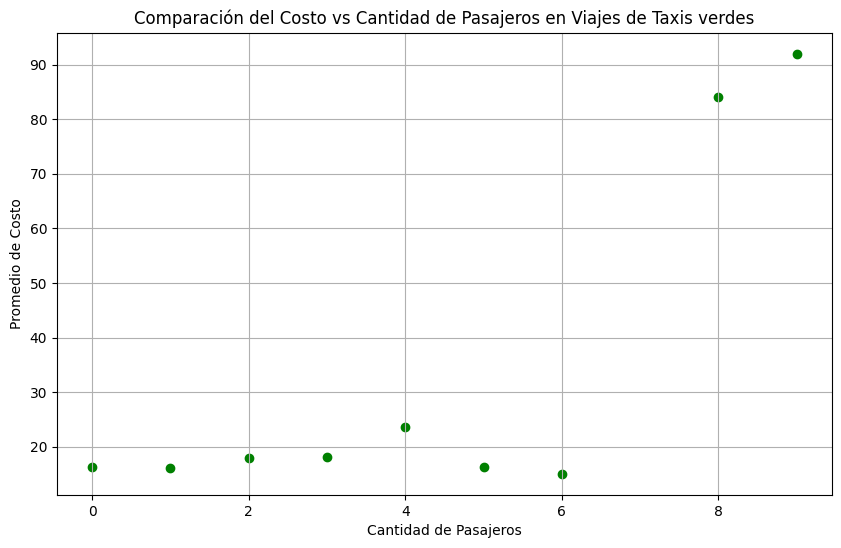

In [25]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Calcular el promedio de costo y la cantidad de pasajeros por viaje
promedio_costo_pasajeros = df_green_taxi.groupby('passenger_count')['fare_amount'].mean().reset_index()

# Graficar la comparación del costo vs la cantidad de pasajeros
plt.figure(figsize=(10, 6))
plt.scatter(promedio_costo_pasajeros['passenger_count'], promedio_costo_pasajeros['fare_amount'], color='green')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Promedio de Costo')
plt.title('Comparación del Costo vs Cantidad de Pasajeros en Viajes de Taxis verdes')
plt.grid(True)
plt.show()

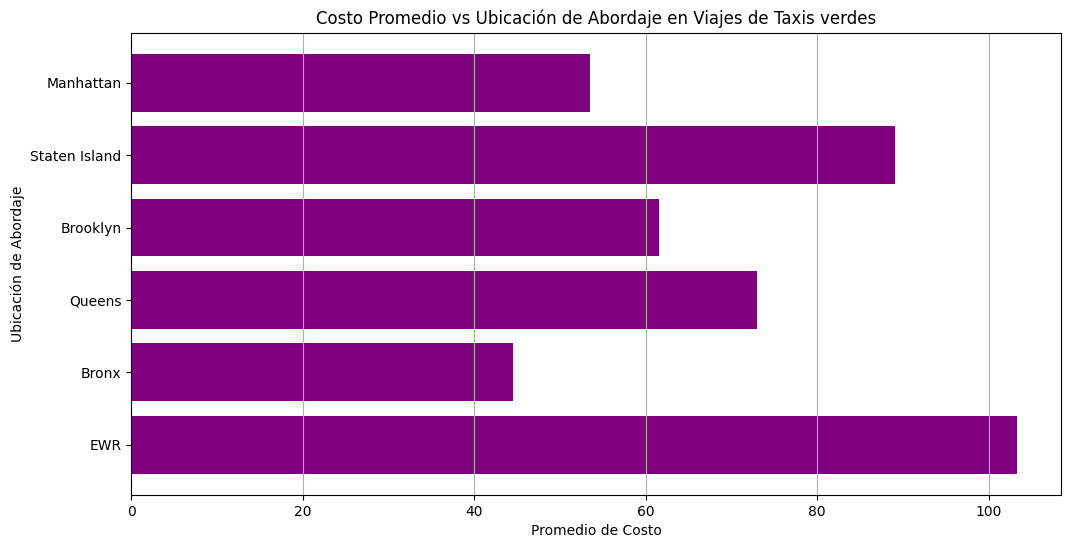

In [26]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Calcular el promedio de costo por ubicación de abordaje
promedio_costo_localizacion = df_green_taxi.groupby('PULocationID')['fare_amount'].mean().reset_index()

# Obtener nombres de las ubicaciones de abordaje a partir de otro dataset
df_ubicaciones = pd.read_parquet(r'Datasets/limpios/localizacion.parquet')
df_ubicaciones.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

# Combinar los DataFrames para obtener nombres de ubicaciones
promedio_costo_localizacion = pd.merge(promedio_costo_localizacion, df_ubicaciones, on='PULocationID')

# Graficar la comparación del costo vs la localización de abordaje
plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_localizacion['Borough'], promedio_costo_localizacion['fare_amount'], color='purple')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Abordaje')
plt.title('Costo Promedio vs Ubicación de Abordaje en Viajes de Taxis verdes')
plt.grid(axis='x')
plt.show()

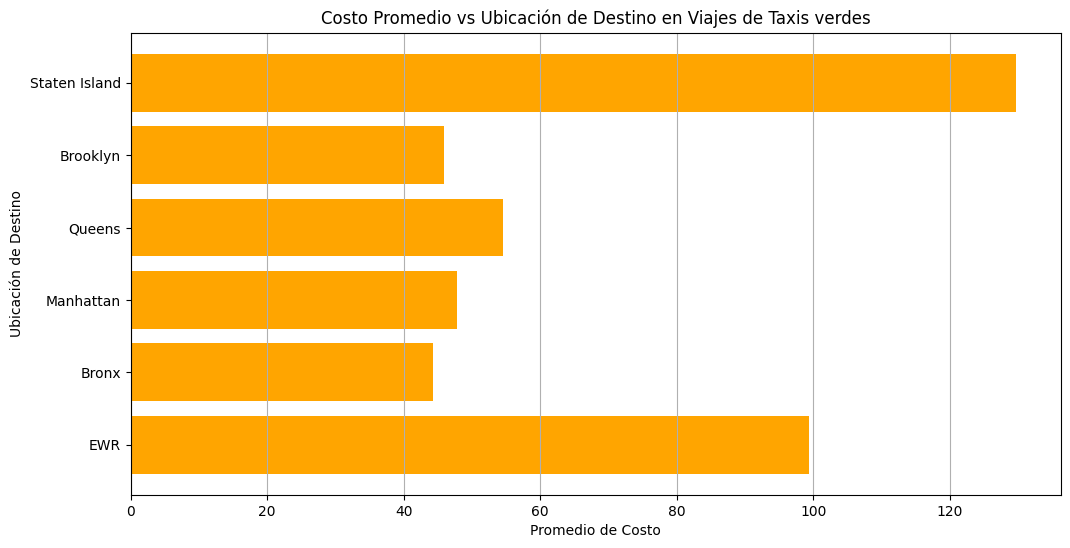

In [27]:
# Filtrar los datos para incluir solo los viajes de taxis verdes
df_green_taxi = df_taxis[df_taxis['taxi_type'] == 'green']

# Calcular el promedio de costo por ubicación de destino
promedio_costo_destino = df_green_taxi.groupby('DOLocationID')['fare_amount'].mean().reset_index()

# Obtener nombres de las ubicaciones de destino a partir de otro dataset
df_destinos = pd.read_parquet(r'Datasets/limpios/localizacion.parquet')
df_destinos.rename(columns={'LocationID': 'DOLocationID'}, inplace=True)

# Combinar los DataFrames para obtener nombres de destinos
promedio_costo_destino = pd.merge(promedio_costo_destino, df_destinos, on='DOLocationID')

# Graficar la comparación del costo vs la localización de destino
plt.figure(figsize=(12, 6))
plt.barh(promedio_costo_destino['Borough'], promedio_costo_destino['fare_amount'], color='orange')
plt.xlabel('Promedio de Costo')
plt.ylabel('Ubicación de Destino')
plt.title('Costo Promedio vs Ubicación de Destino en Viajes de Taxis verdes')
plt.grid(axis='x')
plt.show()